In [26]:
import pandas as pd
import numpy as np
import math
from collections import deque
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import random
from scipy.spatial.distance import euclidean
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [27]:
data = pd.read_csv('moons.csv')
data['cluster'] = 0

data.head()

,Xmoons_X1,Xmoons_X2,cluster
0,-0.378142,0.940750,0
1,0.933566,0.153805,0
2,2.048309,0.498172,0
3,0.947891,0.162473,0
4,2.000739,0.183700,0


<Axes: xlabel='Xmoons_X1', ylabel='Xmoons_X2'>

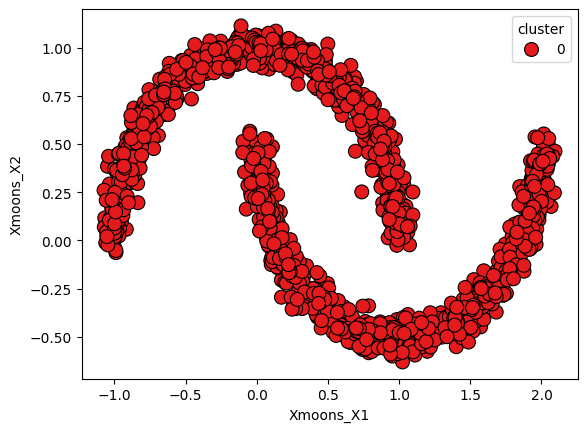

In [28]:
sns.scatterplot(x='Xmoons_X1', y='Xmoons_X2', hue='cluster', data=data, palette='Set1', marker='o', s=100, edgecolor='k')

In [29]:
class HCustom:
    def __init__(self,dataset,requiredClusters = 2,linkage = 'single'):
        self.dataset = dataset
        self.requiredClusters = requiredClusters
        self.linkage = linkage
    
    def eucDist(self, p1, p2):
        return np.sqrt(np.sum((p1-p2)**2))
    
    def singleLinkage(self, cluster1, cluster2):
        minDist = float('inf')
        for i in cluster1:
            for j in cluster2:
                dist = self.eucDist(self.dataset[i], self.dataset[j])
                if dist < minDist:
                    minDist = dist
        return minDist
    
    def averageLinkage(self, cluster1, cluster2):
        totalDist = 0
        for i in cluster1:
            for j in cluster2:
                totalDist += self.eucDist(self.dataset[i], self.dataset[j])
        return totalDist / (len(cluster1) * len(cluster2))
    
    def plotClusters(self, clusters):
        plt.figure(figsize=(6, 6))
        for cluster in clusters:
            cluster_points = self.dataset[cluster]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1])
        plt.xlabel('Xmoons_X1')
        plt.ylabel('Xmoons_X2')
        plt.show()

    def fit(self):
        clusters = [[i] for i in range(len(self.dataset))]

        while len(clusters) > self.requiredClusters:
            minDist = float('inf')
            clusterPair = (-1,-1)

            for i in range(len(clusters)):
                for j in range(i+1,len(clusters)):
                    if self.linkage == 'single':
                        distanceBetween = self.singleLinkage(clusters[i],clusters[j])
                    elif self.linkage == 'average':
                        distanceBetween = self.averageLinkage(clusters[i],clusters[j])

                    if distanceBetween < minDist:
                        minDist = distanceBetween
                        clusterPair = (i,j)
            
            x,y = clusterPair
            newClusterId = clusters[x] + clusters[y]
            clusters = [clusters[i] for i in range(len(clusters)) if i != x and i != y]
            clusters.append(newClusterId)
        
        return clusters
    

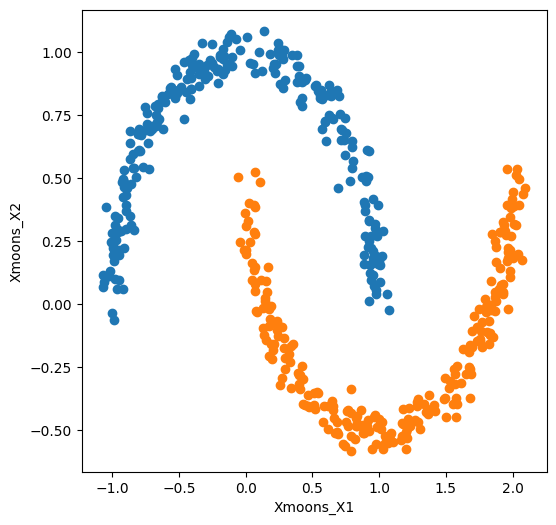

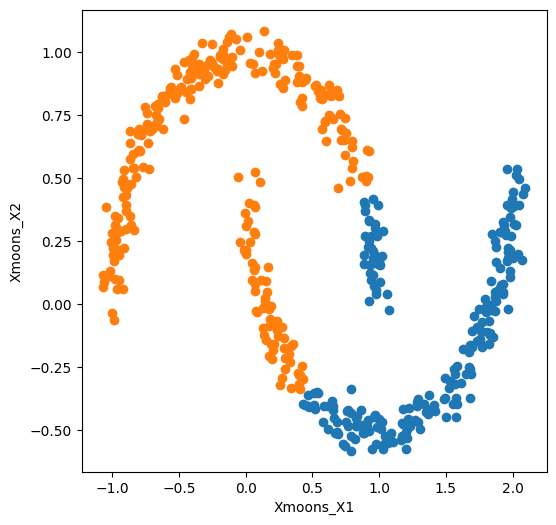

In [31]:
dataset = data[['Xmoons_X1', 'Xmoons_X2']].values[:500]

hc = HCustom(dataset, 2, 'single')
hc1 = HCustom(dataset, 2, 'average')

clusters = hc.fit()
clusters1 = hc1.fit()

hc.plotClusters(clusters)
hc1.plotClusters(clusters1)

<Figure size 1000x600 with 0 Axes>

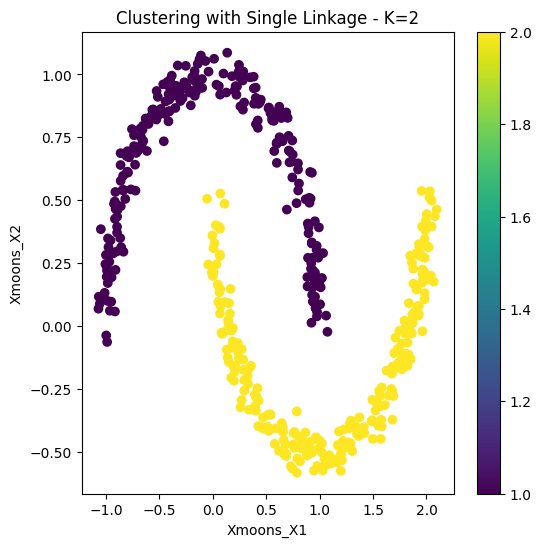

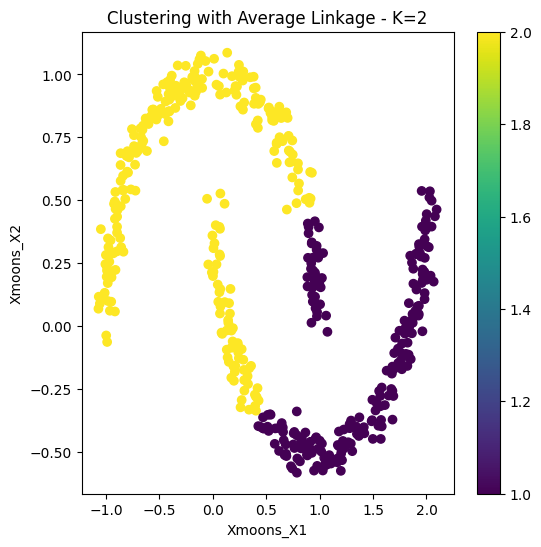

In [33]:
Z_avg = linkage(dataset, method='average')
Z_single = linkage(dataset, method='single')

plt.figure(figsize=(10, 6))

labels_single_K2 = fcluster(Z_single, t=2, criterion='maxclust')
labels_average_K2 = fcluster(Z_avg, t=2, criterion='maxclust')

def plot_clusters(dataset, labels, title):
    plt.figure(figsize=(6, 6))
    scatter = plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Xmoons_X1')
    plt.ylabel('Xmoons_X2')
    plt.colorbar(scatter)
    plt.show()

plot_clusters(dataset, labels_single_K2, 'Clustering with Single Linkage - K=2')
plot_clusters(dataset, labels_average_K2, 'Clustering with Average Linkage - K=2')


